<a href="https://colab.research.google.com/github/Username0515/jetbot_autopilot/blob/2021-07-23/mobilenetTF_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전이학습 준비


In [2]:
import numpy as np
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
 
model = MobileNet(input_shape=(128, 128, 3),include_top=False,weights='imagenet')

17227776/17225924 [==============================] - 0s 0us/step


In [3]:
from tensorflow import keras

# model.summary()

In [4]:
for layer in model.layers:
  layer.trainable = False

In [5]:
last_layer = model.get_layer("conv_pw_13_relu")
last_output = last_layer.output

# 추가 레이어

In [6]:
x = keras.layers.MaxPool2D()(last_output)
x= keras.layers.Flatten()(x)
x = keras.layers.Dense(1000, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)



In [7]:
from tensorflow.keras import Model
making_model = Model(model.input,x)

In [8]:
making_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)        0     

# 예제 데이터 준비

In [ ]:
import pathlib
import tensorflow as tf
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
roses = list(data_dir.glob('roses/*'))

In [ ]:
 import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
 aa =PIL.Image.open(str(roses[0]))
 
 batch_size = 32
img_height = 128
img_width = 128

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
# from tensorflow import keras
# from sklearn.model_selection import train_test_split



# (train_input, train_target), (test_input, test_target) = \
#     keras.datasets.cifar10.load_data()

# train_scaled = train_input.reshape(-1, 32, 32, 3) / 255.0

# train_scaled, val_scaled, train_target, val_target = train_test_split(
#     train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# train_target = keras.utils.to_categorical(train_target)
# val_target = keras.utils.to_categorical(val_target)

NameError: ignored

# 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# 도로 데이터 준비


In [11]:
import glob
import cv2


data_file_path="/content/gdrive/MyDrive/photo/photo_slice/*.png"
data_file_path_middle="/content/gdrive/MyDrive/photo/class/middle/*.png"
data_file_path_none="/content/gdrive/MyDrive/photo/class/none/*.png"


# data_file_path_right="/content/gdrive/MyDrive/photo/class/right/*.png"
# data_file_path_left="/content/gdrive/MyDrive/photo/class/left/*.png"

size_pixel=128


middle_img = []
none_img = []
right_img=[]
left_img=[]
middle_num=0
none_num=0
left_num=0
right_num=0 

i=0
for file in glob.glob(data_file_path_middle):
     mid_img=cv2.imread(str(file))
     i+=1
     middle_img.append(mid_img)
     print("현재 중앙선 진행중:::  {} %".format( 100* round(i/len(glob.glob(data_file_path_middle)),4)  ))
     
print("현재 중앙선 파일 개수 :::  {} 개".format(i))

middle_num =i


i=0
for file in glob.glob(data_file_path_none):
     n_img=cv2.imread(str(file))
     i+=1
     none_img.append(n_img)
     print("현재 none 진행중:::  {} %".format(  100*round(i/len(glob.glob(data_file_path_middle)),4)  ))
print("현재 none 파일 개수 :::  {} 개".format(i))
none_num = i



import numpy as np
target = np.concatenate( ( np.ones(middle_num) ,np.zeros(none_num) ) )  #타겟 만들기



# input data 합치기

train_input = middle_img + none_img 

train_input= np.array(train_input)



from sklearn.model_selection import train_test_split

train_scaled = train_input.reshape(-1,128,128,3)/255.0


all_input,test_input ,all_target,test_target = train_test_split(train_scaled,target,stratify=target,test_size =0.2,random_state=42)
train_input,val_input ,train_target,val_target = train_test_split(all_input,all_target,stratify=all_target,test_size =0.2,random_state=42)


현재 중앙선 진행중:::  0.7000000000000001 %
현재 중앙선 진행중:::  1.4000000000000001 %
현재 중앙선 진행중:::  2.1 %
현재 중앙선 진행중:::  2.8000000000000003 %
현재 중앙선 진행중:::  3.5000000000000004 %
현재 중앙선 진행중:::  4.2 %
현재 중앙선 진행중:::  4.9 %
현재 중앙선 진행중:::  5.59 %
현재 중앙선 진행중:::  6.29 %
현재 중앙선 진행중:::  6.99 %
현재 중앙선 진행중:::  7.6899999999999995 %
현재 중앙선 진행중:::  8.39 %
현재 중앙선 진행중:::  9.09 %
현재 중앙선 진행중:::  9.790000000000001 %
현재 중앙선 진행중:::  10.489999999999998 %
현재 중앙선 진행중:::  11.19 %
현재 중앙선 진행중:::  11.89 %
현재 중앙선 진행중:::  12.590000000000002 %
현재 중앙선 진행중:::  13.29 %
현재 중앙선 진행중:::  13.99 %
현재 중앙선 진행중:::  14.69 %
현재 중앙선 진행중:::  15.379999999999999 %
현재 중앙선 진행중:::  16.08 %
현재 중앙선 진행중:::  16.78 %
현재 중앙선 진행중:::  17.48 %
현재 중앙선 진행중:::  18.18 %
현재 중앙선 진행중:::  18.88 %
현재 중앙선 진행중:::  19.580000000000002 %
현재 중앙선 진행중:::  20.28 %
현재 중앙선 진행중:::  20.979999999999997 %
현재 중앙선 진행중:::  21.68 %
현재 중앙선 진행중:::  22.38 %
현재 중앙선 진행중:::  23.080000000000002 %
현재 중앙선 진행중:::  23.78 %
현재 중앙선 진행중:::  24.48 %
현재 중앙선 진행중:::  25.169999999999998 %
현재 중앙선 진행중:::  

# 컴파일 및 훈련

In [12]:
making_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [13]:
print(train_input.shape)
history = making_model.fit(train_input ,train_target, validation_data=(val_input,val_target),epochs=20,callbacks=[keras.callbacks.EarlyStopping(patience=3,restore_best_weights=False)])

(120, 128, 128, 3)
Epoch 1/20
4/4 [==============================] - 5s 656ms/step - loss: 4.1885 - accuracy: 0.6750 - val_loss: 1.4596 - val_accuracy: 0.8667
Epoch 2/20
4/4 [==============================] - 2s 491ms/step - loss: 0.3005 - accuracy: 0.9333 - val_loss: 0.1099 - val_accuracy: 0.9667
Epoch 3/20
4/4 [==============================] - 2s 488ms/step - loss: 0.2587 - accuracy: 0.9583 - val_loss: 0.2742 - val_accuracy: 0.9333
Epoch 4/20
4/4 [==============================] - 2s 486ms/step - loss: 0.0659 - accuracy: 0.9750 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 2s 490ms/step - loss: 4.8566e-04 - accuracy: 1.0000 - val_loss: 3.8485e-06 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 2s 487ms/step - loss: 1.7622e-05 - accuracy: 1.0000 - val_loss: 6.1236e-08 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 2s 485ms/step - loss: 3.4572e-07 - accuracy: 1.0000 - val_loss: 7.7692e-09 

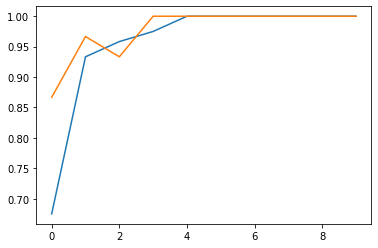

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# 단일 분류

In [21]:
import sys
import cv2
from matplotlib import pyplot as plt
import glob
import time

data_file_path = "/content/gdrive/MyDrive/photo/photo_slice/*.png"  #데이터 이미지 들어있는곳
black_background_path ="/content/gdrive/MyDrive/photo/black_background/black_background.png" #검정색 사진 들어있는곳
# roi_data_path ='/content/gdrive/MyDrive/photo/photo_slice/road_partical_data_{}.png'.format(numoftime)



size_pixel=128



i=0
for _ in glob.glob(data_file_path):
     i+=1
print("현재 파일 개수 :::  {} 개".format(i))

numoffile=i

src=[]
src_color=[]
i=0
for file in glob.glob(data_file_path):
     img=cv2.imread(str(file))
     img_color = img
     img_color =cv2.resize(img_color,(size_pixel,size_pixel))     #이미지 읽어오기
     
     src_color.append(img_color)
     predict_image = np.array(img_color)      #읽어온 이미지 넘파이 형태로 변형


     pre_scaled = predict_image.reshape(-1,128,128,3)/255.0


     if making_model.predict(pre_scaled)>=0.5:
       
       cv2.imwrite("/content/gdrive/MyDrive/photo/middleline/{}.png".format(i), img_color)
     else:
       
       cv2.imwrite("/content/gdrive/MyDrive/photo/noneline/{}.png".format(i), img_color)

     i+=1
     print("확률 " ,100 * round(making_model.predict(pre_scaled)[0][0],4) , "% " )
     print(" 파일 읽어오는중 :::  {} %".format(   round(100 * (i/numoffile)))    )
     print(" 현재 {} 중 {}번 진행중".format(numoffile , i))


# predict_image = np.array(predict_image)

# pre_scaled = predict_image.reshape(-1,128,128,3)/255.0

# making_model.predict(pre_scaled)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 파일 읽어오는중 :::  70 %
 현재 5616 중 3950번 진행중
확률  100.0 % 
 파일 읽어오는중 :::  70 %
 현재 5616 중 3951번 진행중
확률  44.269999861717224 % 
 파일 읽어오는중 :::  70 %
 현재 5616 중 3952번 진행중
확률  0.0 % 
 파일 읽어오는중 :::  70 %
 현재 5616 중 3953번 진행중
확률  100.0 % 
 파일 읽어오는중 :::  70 %
 현재 5616 중 3954번 진행중
확률  100.0 % 
 파일 읽어오는중 :::  70 %
 현재 5616 중 3955번 진행중
확률  0.0 % 
 파일 읽어오는중 :::  70 %
 현재 5616 중 3956번 진행중
확률  0.0 % 
 파일 읽어오는중 :::  70 %
 현재 5616 중 3957번 진행중
확률  100.0 % 
 파일 읽어오는중 :::  70 %
 현재 5616 중 3958번 진행중
확률  100.0 % 
 파일 읽어오는중 :::  70 %
 현재 5616 중 3959번 진행중
확률  0.0 % 
 파일 읽어오는중 :::  71 %
 현재 5616 중 3960번 진행중
확률  0.0 % 
 파일 읽어오는중 :::  71 %
 현재 5616 중 3961번 진행중
확률  100.0 % 
 파일 읽어오는중 :::  71 %
 현재 5616 중 3962번 진행중
확률  100.0 % 
 파일 읽어오는중 :::  71 %
 현재 5616 중 3963번 진행중
확률  0.0 % 
 파일 읽어오는중 :::  71 %
 현재 5616 중 3964번 진행중
확률  100.0 % 
 파일 읽어오는중 :::  71 %
 현재 5616 중 3965번 진행중
확률  100.0 % 
 파일 읽어오는중 :::  71 %
 현재 5616 중 3966번 진행중
확률  100.0 % 
 파일 읽어오는중 :::  71 %
 현재 5616 중 3967번 진행중
확률  

# 틀린점 있으면 분류 후 다시 채점을 위해 다시 데이터 준비


In [ ]:

data_file_path="/content/gdrive/MyDrive/photo/photo_slice/*.png"
data_file_path_middle="/content/gdrive/MyDrive/photo/middleline_fix/*.png"
data_file_path_none="/content/gdrive/MyDrive/photo/class/noneline_fix/*.png"

size_pixel=128

middle_img = []
none_img = []
right_img=[]
left_img=[]
middle_num=0
none_num=0
left_num=0
right_num=0 

i=0
for file in glob.glob(data_file_path_middle):
     mid_img=cv2.imread(str(file))
     i+=1
     middle_img.append(mid_img)
     print("현재 중앙선 진행중:::  {} %".format( 100* round(i/len(glob.glob(data_file_path_middle)),4)  ))
     
print("현재 중앙선 파일 개수 :::  {} 개".format(i))

middle_num =i


i=0
for file in glob.glob(data_file_path_none):
     n_img=cv2.imread(str(file))
     i+=1
     none_img.append(n_img)
     print("현재 none 진행중:::  {} %".format(  100*round(i/len(glob.glob(data_file_path_middle)),4)  ))
print("현재 none 파일 개수 :::  {} 개".format(i))
none_num = i



import numpy as np
target = np.concatenate( ( np.ones(middle_num) ,np.zeros(none_num) ) )  #타겟 만들기



# input data 합치기

train_input = middle_img + none_img 

train_input= np.array(train_input)



from sklearn.model_selection import train_test_split

train_scaled = train_input.reshape(-1,128,128,3)/255.0


all_input,test_input ,all_target,test_target = train_test_split(train_scaled,target,stratify=target,test_size =0.2,random_state=42)
train_input,val_input ,train_target,val_target = train_test_split(all_input,all_target,stratify=all_target,test_size =0.2,random_state=42)

현재 파일 개수 :::  5616 개
각각 확률 
 class 0 :: 0.9916 
 class 1 :: 0.0032 
 class 2 :: 0.0052 
 class 3 :: 0.0 

 분류 클래스  :::   0
 파일 읽어오는중 :::  0 %
 현재 5616 중 1번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 1.0 
 class 2 :: 0.0 
 class 3 :: 0.0 

 분류 클래스  :::   1
 파일 읽어오는중 :::  0 %
 현재 5616 중 2번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 1.0 
 class 2 :: 0.0 
 class 3 :: 0.0 

 분류 클래스  :::   1
 파일 읽어오는중 :::  0 %
 현재 5616 중 3번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 1.0 
 class 2 :: 0.0 
 class 3 :: 0.0 

 분류 클래스  :::   1
 파일 읽어오는중 :::  0 %
 현재 5616 중 4번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 0.0 
 class 2 :: 1.0 
 class 3 :: 0.0 

 분류 클래스  :::   2
 파일 읽어오는중 :::  0 %
 현재 5616 중 5번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 0.0 
 class 2 :: 0.0 
 class 3 :: 1.0 

 분류 클래스  :::   3
 파일 읽어오는중 :::  0 %
 현재 5616 중 6번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 0.0 
 class 2 :: 1.0 
 class 3 :: 0.0 

 분류 클래스  :::   2
 파일 읽어오는중 :::  0 %
 현재 5616 중 7번 진행중 


각각 확률 
 class 0 :: 0.9916 
 class 1 :: 

KeyboardInterrupt: ignored

# 다시 훈련

In [ ]:
print(train_input.shape)
history = making_model.fit(train_input ,train_target, validation_data=(val_input,val_target),epochs=20,callbacks=[keras.callbacks.EarlyStopping(patience=3,restore_best_weights=False)])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

array([9.9162453e-01, 3.1581528e-03, 5.1920083e-03, 2.5321642e-05],
      dtype=float32)

In [ ]:
making_model.evaluate(test_input,test_target)

# 훈련파일 저장

In [ ]:
making_model.save('model-hole.h5')
!ls -al *.h5

-rw-r--r-- 1 root root 62401712 Jul 20 08:32 model-hole.h5


# 파일 로드

In [ ]:
model_load = keras.models.load_model('model-whole.h5')